In [1]:
import pandas as pd 
import os
import random

## libraries for images
import matplotlib.pyplot as plt 
from PIL import Image
import shutil

In [2]:
images_folder = r"C:\Users\Farouk\Desktop\age-prediction\data\data-raw\UTKFace"

image_files =[]

for image in os.listdir(images_folder) : 
    if image.endswith(('.jpg')):
        image_files.append(image)

## see the results 

print(image_files[0])
print(len(image_files))


100_0_0_20170112213500903.jpg.chip.jpg
23708


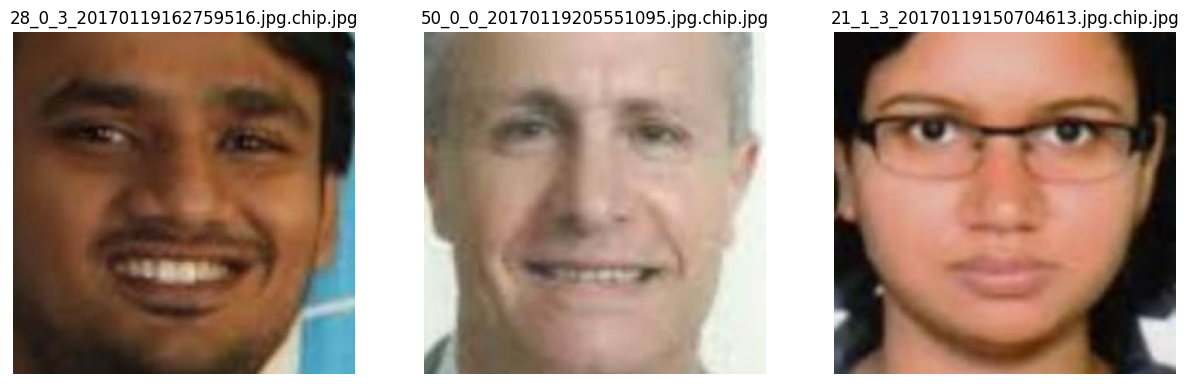

In [38]:
random_images = random.sample(image_files,3)

#show the images
plt.figure(figsize=(15,10))

for i , image_name in enumerate(random_images) :
    img_path = os.path.join(images_folder,image_name)
    img = Image.open(img_path)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_name)
plt.show()

In [39]:
data = []
for file_name in image_files : 
    
    parts = file_name.split('_')
    #here i have a problem so i will try the except methods to see where is the problem 
    try :
        age = int(parts[0])
        id =parts[3].split('.')[0] # here bcs  i have '20170112213500903.jpg.chip.jpg' 
        image_name =f"{id}.jpg"
        data.append({'id' : image_name , 'age' : age})
    except ValueError  :
        print(f"value error fo the file {file_name}")
    except IndexError :
        print(f"Index error for the file {file_name}")


Index error for the file 39_1_20170116174525125.jpg.chip.jpg
Index error for the file 61_1_20170109142408075.jpg.chip.jpg
Index error for the file 61_1_20170109150557335.jpg.chip.jpg


In [40]:
## ok now  i know where is the problem . i should now add those files to the dataframe

file_name_with_problem = ["39_1_20170116174525125.jpg.chip.jpg" , "61_1_20170109142408075.jpg.chip.jpg", "61_1_20170109150557335.jpg.chip.jpg"]

for file_name in file_name_with_problem : 
    parts = file_name.split('_')
    age = parts[0]
    id = parts[2].split('.')[0]
    image_name =f"{id}.jpg"
    data.append({'id' : image_name , 'age' : age})
    

In [41]:
df = pd.DataFrame(data)

df.head()

,id,age
0,20170112213500903.jpg,100
1,20170112215240346.jpg,100
2,20170110183726390.jpg,100
3,20170112213001988.jpg,100
4,20170112213303693.jpg,100


In [42]:
df.shape

(23708, 2)

In [43]:
import shutil


processed_data_path = r'C:\Users\Farouk\Desktop\age-prediction\data\data-interim\UTKFace_processed'

os.makedirs(processed_data_path)


for file_name in image_files : 
    parts = file_name.split('_')
    if len(parts) == 4 : 
        id = parts[3].split('.')[0]
        new_name = f"{id}.jpg"
        img_path = os.path.join(images_folder , file_name)
        destination = os.path.join(processed_data_path , new_name)
        shutil.copy(img_path , destination)
    else : 
        id = parts[2].split('.')[0]
        new_name = f"{id}.jpg"
        img_path = os.path.join(images_folder , file_name)
        destination = os.path.join(processed_data_path , new_name)
        shutil.copy(img_path , destination)
print('done')
        
        


done


In [44]:
file_count = len([f for f in os.listdir(processed_data_path) if os.path.isfile(os.path.join(processed_data_path, f))])
print(f"Nombre de fichiers dans le dossier : {file_count}")

Nombre de fichiers dans le dossier : 23482


In [47]:
## il y'a des images qui manquent !!! 

list_image_not_named = []

for image in df['id']: 
    if image not in os.listdir(processed_data_path) : 
        list_image_not_named.append(image)

list_image_not_named

## after  executing this code we found the list is empty  

In [48]:
file_count = [f for f in os.listdir(processed_data_path) ]
print(f"Nombre de fichiers dans le dossier : {len(file_count)}")

Nombre de fichiers dans le dossier : 23482


In [49]:
from collections import Counter


# Récupérer tous les noms de fichiers
file_names = os.listdir(processed_data_path)

# Compter les occurrences de chaque fichier
file_counts = Counter(file_names)

# Trouver les doublons
duplicates = [file for file, count in file_counts.items() if count > 1]

# Afficher les résultats
if duplicates:
    print("Fichiers en double :")
    for file in duplicates:
        print(file)
else:
    print("Aucun fichier en double trouvé.")

Aucun fichier en double trouvé.


In [50]:
# Trouver les doublons dans la colonne 'id'
duplicates = df[df['id'].duplicated()]

# Afficher les résultats
if not duplicates.empty:
    print("Doublons trouvés :")
    print(duplicates)
else:
    print("Aucun doublon trouvé dans la colonne 'id'.")


Doublons trouvés :
                          id  age
11     20170112213500903.jpg  101
13     20170112213001988.jpg  103
14     20170112213001988.jpg  105
15     20170112213001988.jpg  105
18     20170112213303693.jpg  105
...                      ...  ...
23402  20170110175833643.jpg   90
23452  20170110175738208.jpg   90
23456  20170110182008441.jpg   90
23496  20170110183501116.jpg   92
23536  20170120134639935.jpg   99

[226 rows x 2 columns]


In [51]:
df = df.drop_duplicates(subset='id', keep='first')

In [52]:
# Trouver les doublons dans la colonne 'id'
duplicates = df[df['id'].duplicated()]

# Afficher les résultats
if not duplicates.empty:
    print("Doublons trouvés :")
    print(duplicates)
else:
    print("Aucun doublon trouvé dans la colonne 'id'.")

Aucun doublon trouvé dans la colonne 'id'.


In [53]:
labled_images = (r'C:\Users\Farouk\Desktop\age-prediction\data\data-interim\labled_images.csv')

df.to_csv(labled_images , index=False)

In [54]:
df.shape

(23482, 2)

C:\Users\Farouk\AppData\Local\Temp\ipykernel_16556\435661080.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')


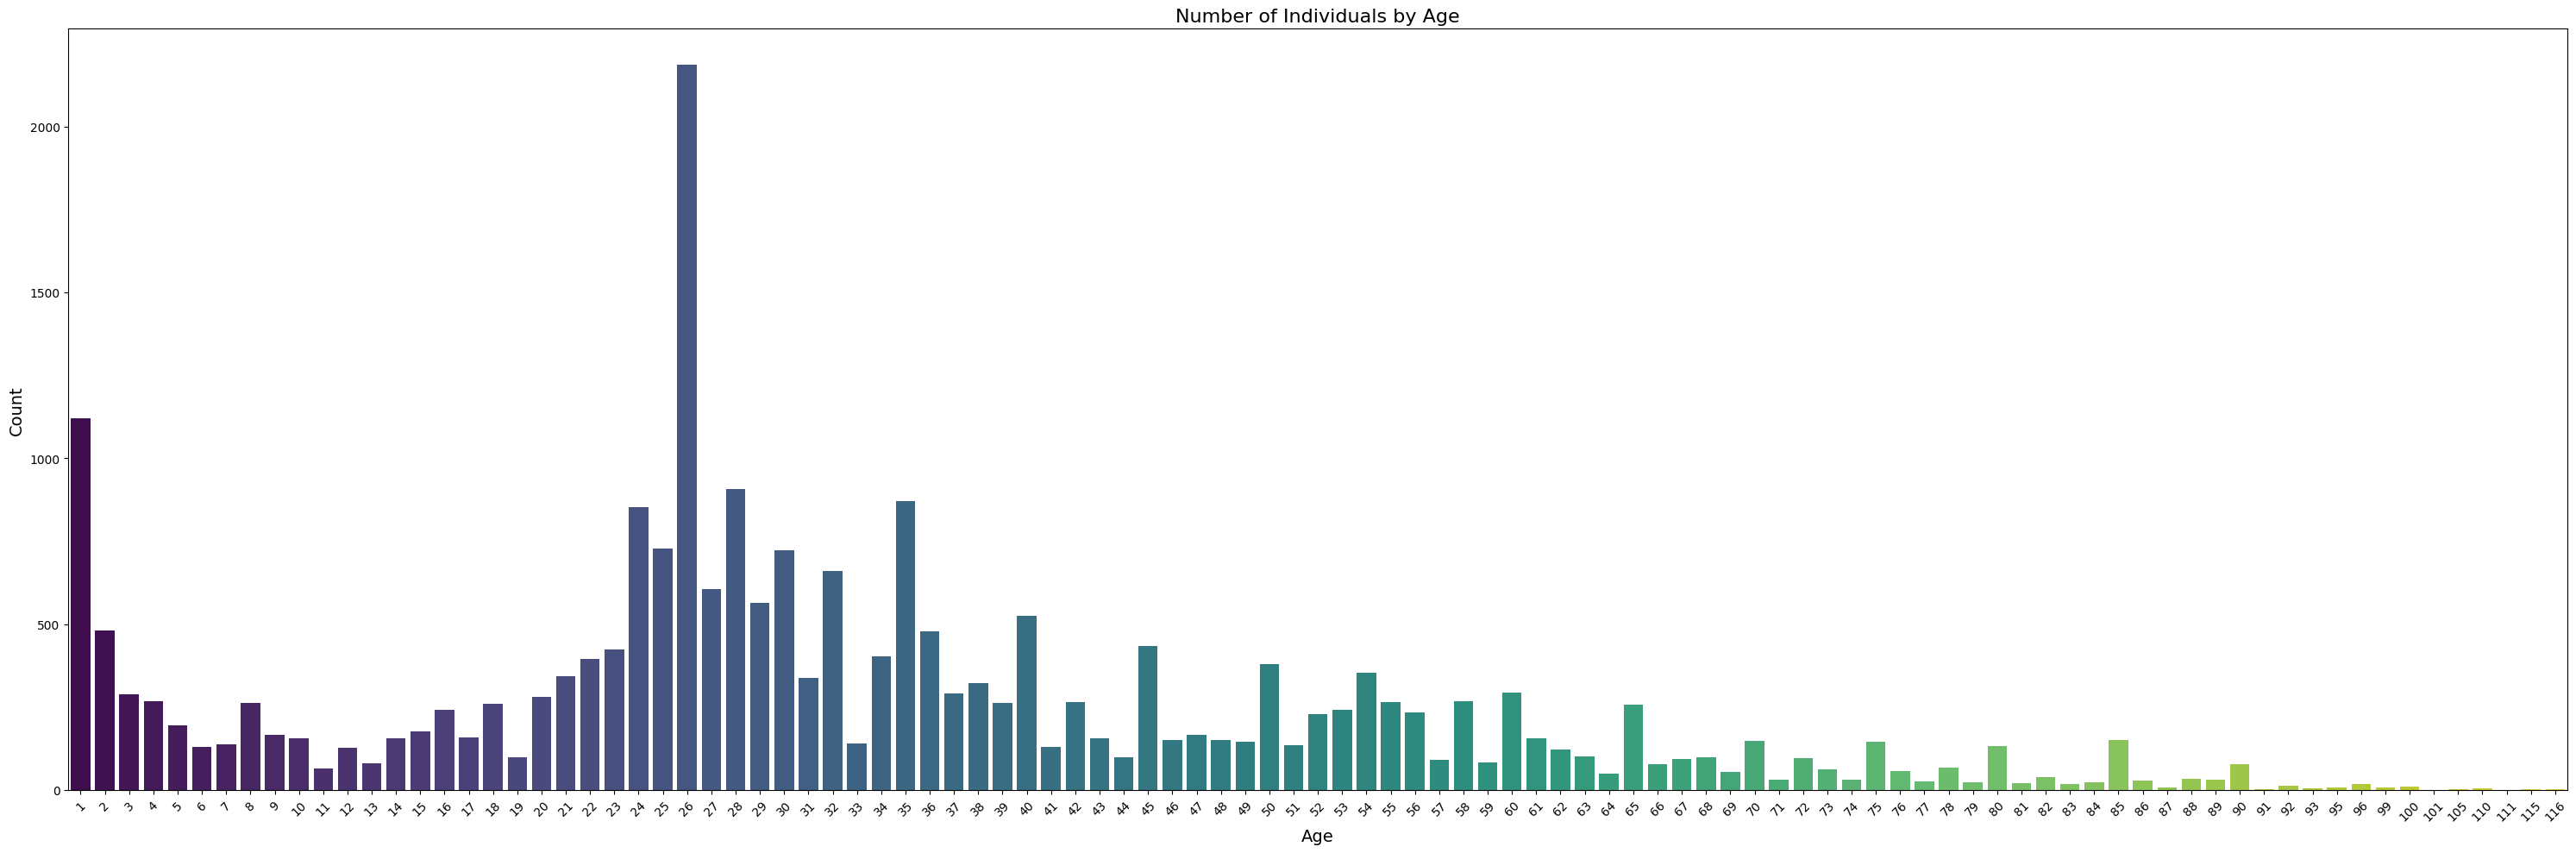

In [55]:
import seaborn as sns

# Ensure 'age' is numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Count the number of individuals for each age
age_counts = df['age'].value_counts().sort_index()

# Optionally: Use Seaborn for a more polished look
plt.figure(figsize=(30, 10))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.title('Number of Individuals by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()